   ## The Sparks Foundation

Author : **Deepak Kumar** 
    
Task#1 : Iris Flower Classification ML Project
                                                
Level : Beginner level task

Language : Python
                                                
IDE : Jupyter Notebook

Github Link : https://github.com/dk208208/LGMVIP-DataScience/blob/main/Task_01

Youtube : 

#### Importing Important Libraries 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

####  Importing Dataset

In [14]:
path = "F:\EDYODA\Jupyter Notebook\Grip Foundation\Task#1\Iris.csv"
dataset = pd.read_csv(path)

In [15]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# showing keys of dataset

dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# Brief Descrption of Iris Dataset 

print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Also, 
 We can check what is our feature_names, target_names and target data.

In [5]:
# Convert Dataset into Dataframe

df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)

In [6]:
# Target Names
x = 1
for i in dataset.target_names:
    print(x,":",i)
    x+=1

1 : setosa
2 : versicolor
3 : virginica


In [7]:
df['Target'] = dataset.target

### EDA 

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df.shape

(150, 5)

In [10]:
df.drop_duplicates(inplace= True)

In [11]:
df.shape

(149, 5)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal width (cm)   149 non-null    float64
 2   petal length (cm)  149 non-null    float64
 3   petal width (cm)   149 non-null    float64
 4   Target             149 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 6.4 KB


In [13]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
dtype: int64

In [14]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631,0.993289
std,0.830851,0.436342,1.767791,0.762622,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Data Visualization 

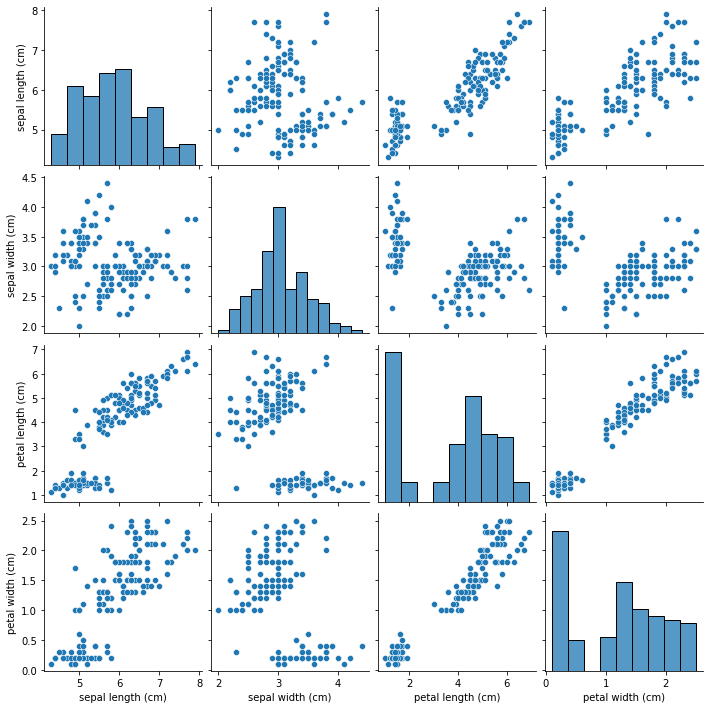

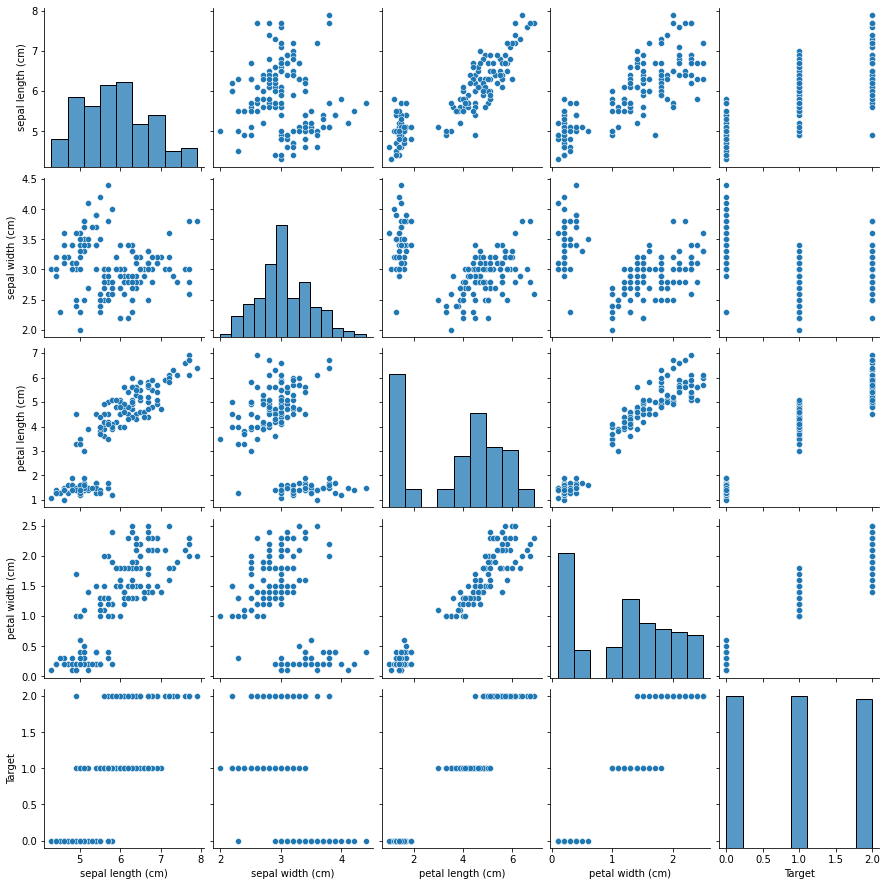

In [15]:
sns.pairplot(data=df.drop(columns=['Target']))
sns.pairplot(data=df)

#### Analyse Correlations 

In [16]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
sepal length (cm),1.000000,-0.118129,0.873738,0.820620,0.786971
sepal width (cm),-0.118129,1.000000,-0.426028,-0.362894,-0.422987
petal length (cm),0.873738,-0.426028,1.000000,0.962772,0.949402
petal width (cm),0.820620,-0.362894,0.962772,1.000000,0.956514
Target,0.786971,-0.422987,0.949402,0.956514,1.000000


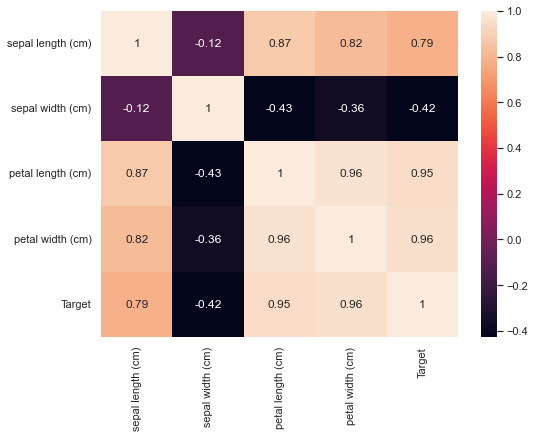

In [17]:
sns.set()
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot = True)
plt.show()

### Splitting the Dataset into Testing and Training Dataset

In [18]:
X = df.drop(columns=['Target'])
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X,y)

#### Logistic Regression

In [19]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [20]:
lr.score(X_test, y_test)

0.9210526315789473